In [13]:
import pandas as pd  

# Load the CSV into a DataFrame  
df = pd.read_csv('/home/pmonteag/brevitas/results_llama/results.csv')  

#print(df.columns)
acc_columns = [df[column] for column in df.columns if "_acc," in column]
avg_few_shot = sum(acc_columns) / len(acc_columns)
#print(avg_few_shot)
df["avg_few_shot"] = avg_few_shot
df = df[(df['stiefel_optimizer'] == 'riemann_adam')]
# df = df[(df['quant_ppl'] < 1000.)]
#df = df[(df['learning_rate'] == 0.1)]
# Select certain columns  
selected_columns = ['job_id', 'gamma', 'learning_rate', 'float_ppl', 'quant_ppl', 'avg_few_shot', 'piqa_acc,none', 'winogrande_acc,none', 'arc_easy_acc,none']  # Change these to your actual column names  
df = df[selected_columns]
df = df.sort_values('gamma')
# df = df[(df['learning_rate'] == 1.5) & (df['use_distillation_loss'] == True)]

# Display the filtered DataFrame  
print(df)  

print(list(df["quant_ppl"]))


                              job_id  gamma  learning_rate  float_ppl  \
25  5c8c0e51fff99c75a5bee5379c0e61ec    0.0          0.005   8.780918   
26  a4a27f67ab99f036b9e67e9b3562af2a    0.0          0.100   8.780918   
28  6f685518539b76702a4a3dd8180260d9    0.0          0.020   8.780918   
0   d31dc78ab1e99738d46345e22bcaf65d    0.1          0.005   8.780918   
23  c0815435ef88d11b86c6d4279c59cadb    0.1          0.020   8.780918   
30  0ad34430ad248ad1746eaee1f78049ea    0.1          0.100   8.780918   
11  db785eac320d94e5193e8403ee6cb5ed    0.5          0.100   8.780918   
12  95ad19cc5b43f2418ea94dab7732644f    0.5          0.005   8.780918   
16  e1ccc7f0de6f7bd8e2964dc39796662a    0.5          0.020   8.780918   
2   75cbba4fe41dbc52c376e4ea27a73cd1    0.9          0.020   8.780918   
7   e47e53a7978705199bba7e6c25bd686a    0.9          0.100   8.780918   
9   9fdd23464b8b60497efeff92d875c85d    0.9          0.005   8.780918   
20  7ea24f0563f76fb6365bb3ad84d8e875    1.0        

In [46]:
# Specify the metric (target column)  
target_metric = 'quant_ppl'  # Replace with your actual target metric column name  

# Compute correlations between features and the target metric  
feature_columns = ['gamma', 'beta', 'temperature', 'avg_few_shot']  # Replace with your actual feature column names  
correlations = df[feature_columns + [target_metric]].corr()[target_metric]  

# Display correlations of features with the target metric  
print(correlations) 

gamma          -0.665617
beta           -0.363805
temperature     0.033672
avg_few_shot   -0.284203
quant_ppl       1.000000
Name: quant_ppl, dtype: float64


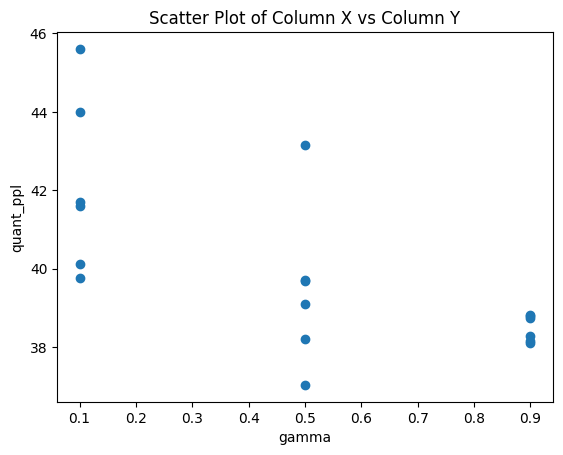

In [47]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Define the columns to plot  
x_column = 'gamma'  # Replace with your actual column names  
y_column = 'quant_ppl'  
  
# Create the plot  
plt.scatter(df[x_column], df[y_column])  
  
# Add titles and labels  
plt.title('Scatter Plot of Column X vs Column Y')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Show the plot  
plt.show()  

In [48]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error  
  
# Load your data into a DataFrame

print(df.head())
  
# Define the target column and feature columns  
target_column = 'quant_ppl'  # Replace with your actual target column name  
feature_columns = ['beta', 'gamma', 'temperature']  # Select all other columns as features  
  
# Separate into features (X) and target (y)  
X = df[feature_columns]  
y = df[target_column]
  
# Initialize and fit the Random Forest model  
rf = RandomForestRegressor(n_estimators=10, random_state=42)  
rf.fit(X, y)  
  
# Predict and evaluate the model  
predictions = rf.predict(X)  
mse = mean_squared_error(y, predictions)  
print(f'Mean Squared Error: {mse}')  
  
# Get and print feature importances  
feature_importances = rf.feature_importances_  
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})  
importance_df = importance_df.sort_values(by='Importance', ascending=False)  
  
print("\nFeature Importances:")  
print(importance_df)  

  use_distillation_loss  beta  gamma  temperature  learning_rate  float_ppl  \
0                  True   0.0    0.1          1.0            1.5  13.738975   
1                  True   0.5    0.1          1.0            1.5  13.738975   
2                  True   1.0    0.1          1.0            1.5  13.738975   
3                  True   0.0    0.1          2.0            1.5  13.738975   
4                  True   0.5    0.1          2.0            1.5  13.738975   

   quant_ppl  avg_few_shot  
0  43.998531      0.393928  
1  40.111938      0.404487  
2  39.764233      0.402009  
3  45.606239      0.399197  
4  41.699474      0.400605  
Mean Squared Error: 0.6614252052049663

Feature Importances:
       Feature  Importance
1        gamma    0.674725
0         beta    0.223931
2  temperature    0.101344


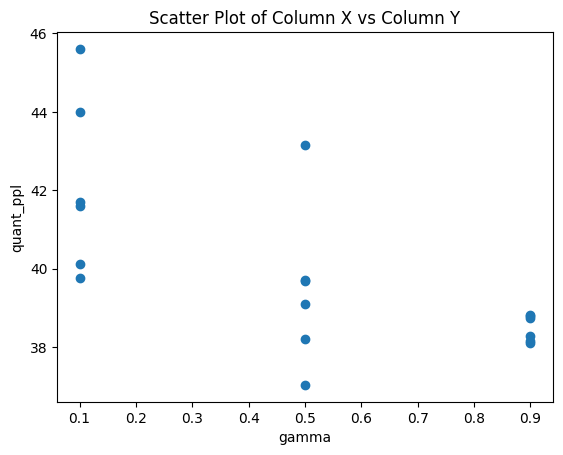

In [49]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Define the columns to plot  
x_column = 'gamma'  # Replace with your actual column names  
y_column = 'quant_ppl'  
  
# Create the plot  
plt.scatter(df[x_column], df[y_column])  
  
# Add titles and labels  
plt.title('Scatter Plot of Column X vs Column Y')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Show the plot  
plt.show()  

In [50]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error  
  
# Load your data into a DataFrame

print(df.head())
  
# Define the target column and feature columns  
target_column = 'avg_few_shot'  # Replace with your actual target column name  
feature_columns = ['beta', 'gamma', 'temperature']  # Select all other columns as features  
  
# Separate into features (X) and target (y)  
X = df[feature_columns]  
y = df[target_column]  
  
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# Initialize and fit the Random Forest model  
rf = RandomForestRegressor(n_estimators=10, random_state=42)  
rf.fit(X_train, y_train)  
  
# Predict and evaluate the model  
predictions = rf.predict(X_test)  
mse = mean_squared_error(y_test, predictions)  
print(f'Mean Squared Error: {mse}')  
  
# Get and print feature importances  
feature_importances = rf.feature_importances_  
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})  
importance_df = importance_df.sort_values(by='Importance', ascending=False)  
  
print("\nFeature Importances:")  
print(importance_df)  

  use_distillation_loss  beta  gamma  temperature  learning_rate  float_ppl  \
0                  True   0.0    0.1          1.0            1.5  13.738975   
1                  True   0.5    0.1          1.0            1.5  13.738975   
2                  True   1.0    0.1          1.0            1.5  13.738975   
3                  True   0.0    0.1          2.0            1.5  13.738975   
4                  True   0.5    0.1          2.0            1.5  13.738975   

   quant_ppl  avg_few_shot  
0  43.998531      0.393928  
1  40.111938      0.404487  
2  39.764233      0.402009  
3  45.606239      0.399197  
4  41.699474      0.400605  
Mean Squared Error: 1.890432144191158e-05

Feature Importances:
       Feature  Importance
0         beta    0.507384
1        gamma    0.302445
2  temperature    0.190172


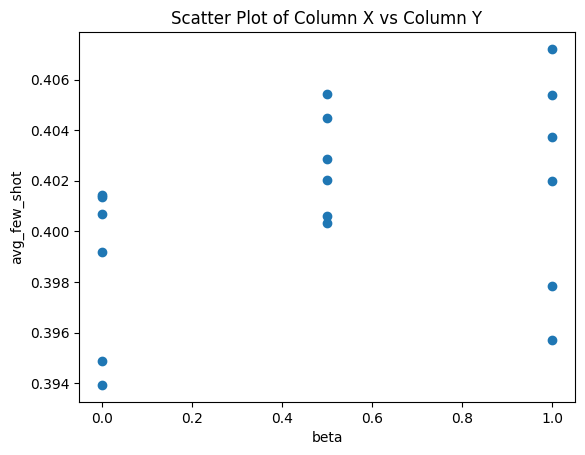

In [52]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Define the columns to plot  
x_column = 'beta'  # Replace with your actual column names  
y_column = 'avg_few_shot'  
  
# Create the plot  
plt.scatter(df[x_column], df[y_column])  
  
# Add titles and labels  
plt.title('Scatter Plot of Column X vs Column Y')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Show the plot  
plt.show()  

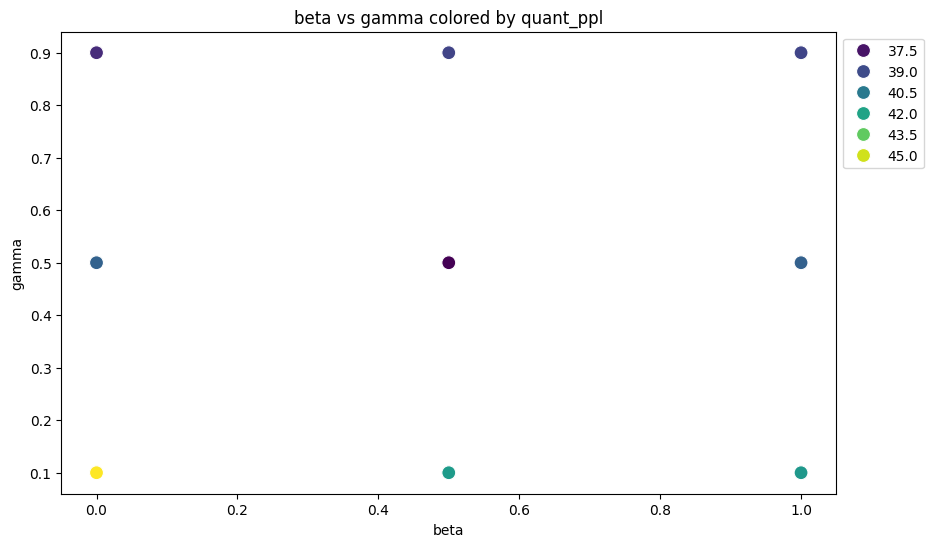

In [53]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
  
# Define the columns for the plot  
x_column = 'beta'  # Replace with your actual column name  
y_column = 'gamma'  # Replace with your actual column name  
color_column = 'quant_ppl'  # Replace with your actual column name for color  
  
# Create the scatter plot  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x=x_column, y=y_column, hue=color_column, palette='viridis', s=100)  
  
# Add title and labels  
plt.title(f'{x_column} vs {y_column} colored by {color_column}')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Move the legend outside  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# Display the plot  
plt.show()  

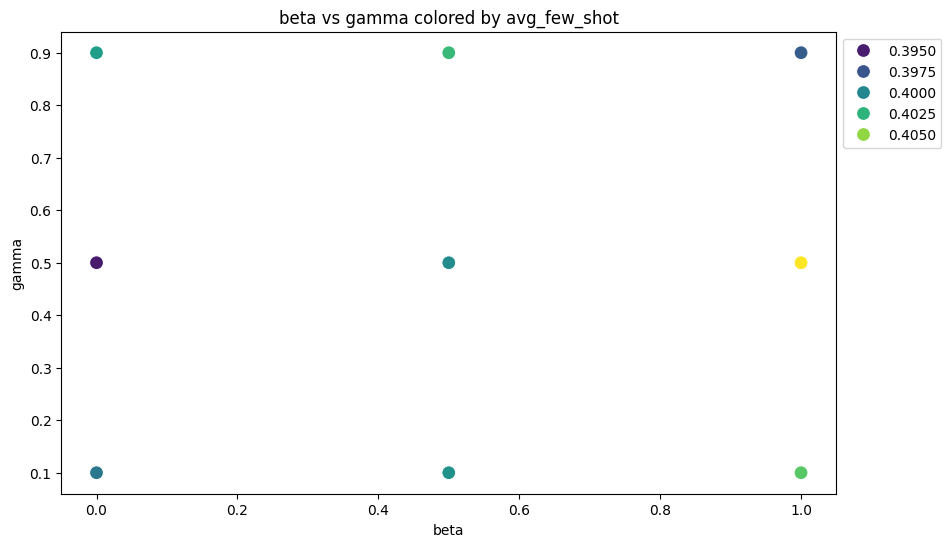

In [54]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
  
# Define the columns for the plot  
x_column = 'beta'  # Replace with your actual column name  
y_column = 'gamma'  # Replace with your actual column name  
color_column = 'avg_few_shot'  # Replace with your actual column name for color  
  
# Create the scatter plot  
plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x=x_column, y=y_column, hue=color_column, palette='viridis', s=100)  
  
# Add title and labels  
plt.title(f'{x_column} vs {y_column} colored by {color_column}')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Move the legend outside  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# Display the plot  
plt.show()  

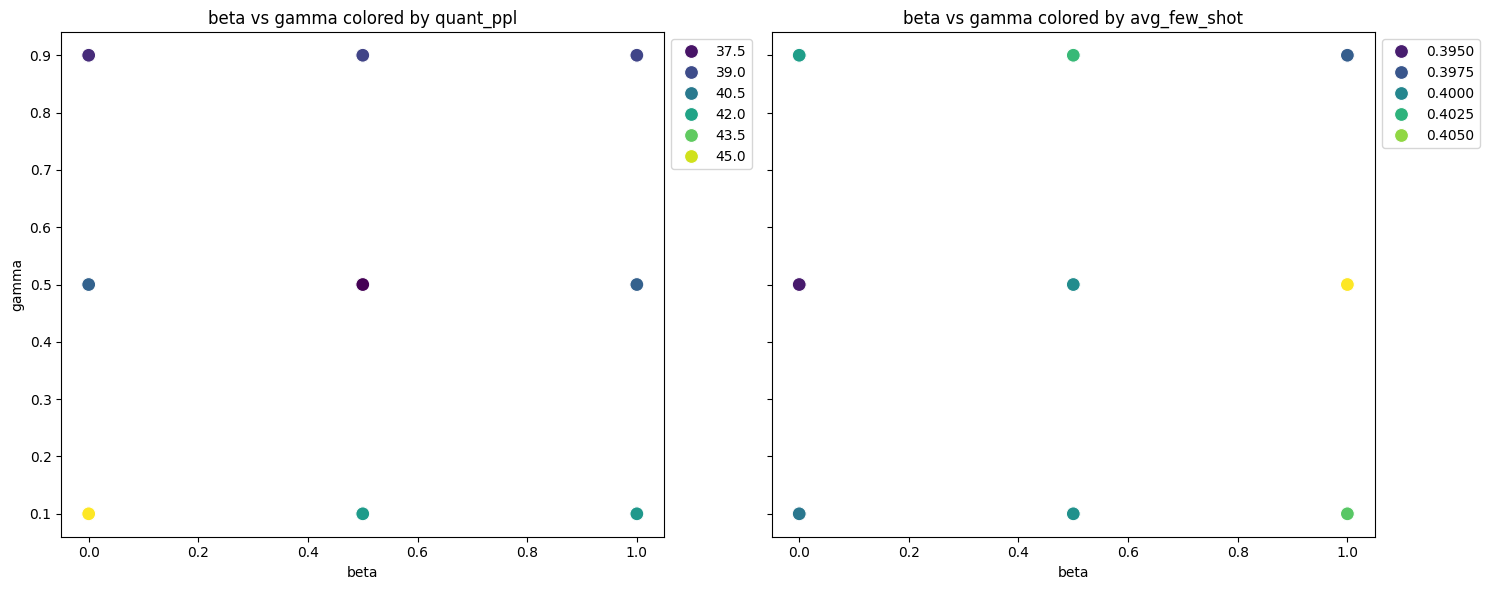

In [56]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# Define the columns for the plots  
x_column = 'beta'  # Replace with your actual column name  
y_column = 'gamma'  # Replace with your actual column name for the first target metric
color_column1 = 'quant_ppl'  # Replace with your actual column name for color  
color_column2 = 'avg_few_shot'  # Replace with your actual column name for color  
  
# Set up the figure and axes for two subplots side by side  
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)  # Share x and y axis scales  
  
# Plot 1: Features vs. First Target Metric  
sns.scatterplot(data=df, x=x_column, y=y_column, hue=color_column1, palette='viridis', s=100, ax=axes[0])  
axes[0].set_title(f'{x_column} vs {y_column} colored by {color_column1}')  
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))  
  
# Plot 2: Features vs. Second Target Metric  
sns.scatterplot(data=df, x=x_column, y=y_column, hue=color_column, palette='viridis', s=100, ax=axes[1])  
axes[1].set_title(f'{x_column} vs {y_column} colored by {color_column2}')  
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))  
  
# Adjust layout  
plt.tight_layout()  
  
# Display the plots  
plt.show()  

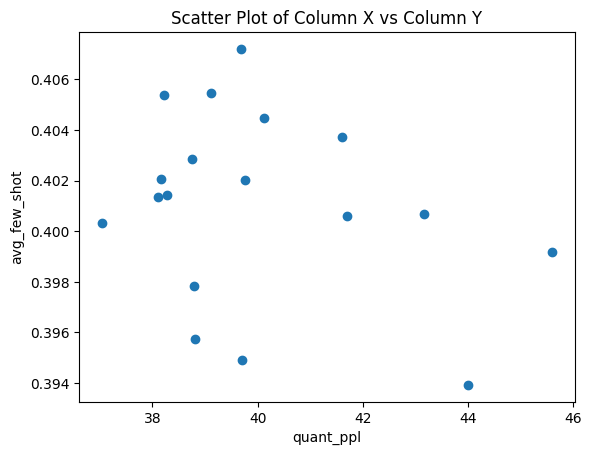

In [57]:
import pandas as pd  
import matplotlib.pyplot as plt 

# Define the columns to plot  
x_column = 'quant_ppl'  # Replace with your actual column names  
y_column = 'avg_few_shot'  
  
# Create the plot  
plt.scatter(df[x_column], df[y_column])  
  
# Add titles and labels  
plt.title('Scatter Plot of Column X vs Column Y')  
plt.xlabel(x_column)  
plt.ylabel(y_column)  
  
# Show the plot  
plt.show()  